# What is a "good" wine?

- The first part of this project will be determining the physiochemical properties which make a wine "good." 
- The later part of this project will predict the wine quality score.
- Target variable: "Good" wine, constituted by a quality score of 7 or above. 

## Section 1: Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Set display options
pd.set_option('display.max_columns', None)

## Section 2: Load and explore the dataset

### Preliminary data exploration is necessary to... 
- Understand the content and the structure of the data, as well as check for any missing values. 
- Check the basic statistics and visualize how the variables in the dataset are interacting with each other. This will tell us what variables, if any, appear to be statistically significant. 

### 2a: Load the datasets

In [2]:
red_wine = pd.read_csv('/Users/haley/Wine-Quality/winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('/Users/haley/Wine-Quality/winequality-white.csv', delimiter=';')

### 2b: Explore the datasets

In [3]:
# Display basic information about the datasets
print("Red Wine Dataset Info:")
print(red_wine.info())
print("\nWhite Wine Dataset Info:")
print(white_wine.info())

# Display first few rows of the datasets
print("Red Wine Dataset:")
display(red_wine.head())
print("White Wine Dataset:")
display(white_wine.head())

Red Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

White Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 489

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


White Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Section 3: Data Preprocessing

### 3a: Check for missing values and duplicates

In [4]:
# Check for missing values
print("Missing values in Red Wine Dataset:")
print(red_wine.isnull().sum())
print("Missing values in White Wine Dataset:")
print(white_wine.isnull().sum())

# Check for duplicates
print("Duplicate rows in Red Wine Dataset:", red_wine.duplicated().sum())
print("Duplicate rows in White Wine Dataset:", white_wine.duplicated().sum())

# Remove duplicates from the datasets
red_wine_cleaned = red_wine.drop_duplicates()
white_wine_cleaned = white_wine.drop_duplicates()

# Check the number of rows after removing duplicates
print("Number of rows after removing duplicates:")
print("Red Wine:", len(red_wine_cleaned))
print("White Wine:", len(white_wine_cleaned))

Missing values in Red Wine Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Missing values in White Wine Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Duplicate rows in Red Wine Dataset: 240
Duplicate rows in White Wine Dataset: 937
Number of rows after removing duplicates:
Red Wine: 1359
White Wine: 3961


### 3b: Detect and Remove Outliers

In [5]:
# Define a function to detect outliers using the IQR method
def remove_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

# Remove outliers from the datasets
red_wine_cleaned = remove_outliers(red_wine_cleaned)
white_wine_cleaned = remove_outliers(white_wine_cleaned)

# Check the number of rows after removing outliers
print("Number of rows after removing outliers:")
print("Red Wine:", len(red_wine_cleaned))
print("White Wine:", len(white_wine_cleaned))

Number of rows after removing outliers:
Red Wine: 974
White Wine: 3083


### 3c: Convert Columns to Numeric and Handle NaNs

In [6]:
# Columns to be converted and used for the analysis
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
           'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Function to convert columns to numeric and handle errors
def convert_to_numeric(df, cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Function to drop NaNs and non-finite values
def drop_na_and_non_finite(df, cols):
    df = df.dropna(subset=cols)
    df = df[np.isfinite(df[cols]).all(axis=1)]
    return df

# Clean the datasets
red_wine_cleaned = convert_to_numeric(red_wine_cleaned, columns)
red_wine_cleaned = drop_na_and_non_finite(red_wine_cleaned, columns)
white_wine_cleaned = convert_to_numeric(white_wine_cleaned, columns)
white_wine_cleaned = drop_na_and_non_finite(white_wine_cleaned, columns)

# Verify that the data is clean and free of NaNs or non-finite values
print("Red Wine Dataset after cleaning:")
print(red_wine_cleaned.info())
print(red_wine_cleaned.isnull().sum())
print("\nWhite Wine Dataset after cleaning:")
print(white_wine_cleaned.info())
print(white_wine_cleaned.isnull().sum())

Red Wine Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         974 non-null    float64
 1   volatile acidity      974 non-null    float64
 2   citric acid           974 non-null    float64
 3   residual sugar        974 non-null    float64
 4   chlorides             974 non-null    float64
 5   free sulfur dioxide   974 non-null    float64
 6   total sulfur dioxide  974 non-null    float64
 7   density               974 non-null    float64
 8   pH                    974 non-null    float64
 9   sulphates             974 non-null    float64
 10  alcohol               974 non-null    float64
 11  quality               974 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 98.9 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sug

Given that I am looking to explore relationships and build a model to predict wine quality, I will proceed without standardization. If necessary, I will standardize later to see if the model is improved.

## Section 4: Data Analysis and Visualization

### 4a: Basic Statistics

In [7]:
# Displaying information and basic statistics of the datasets

# Red wine dataset
red_wine_cleaned.describe()

# White wine dataset
red_wine_cleaned.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,8.140452,0.522726,0.247402,2.189014,0.078245,14.739220,41.287474,0.996520,3.324589,0.627731,10.381725,5.627310
std,1.461878,0.167434,0.181813,0.446676,0.014971,8.575387,25.215281,0.001579,0.131052,0.111256,0.981483,0.733653
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992400,2.980000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.068000,8.000000,22.000000,0.995500,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996530,3.320000,0.610000,10.100000,6.000000
75%,9.000000,0.635000,0.400000,2.500000,0.087000,20.000000,55.000000,0.997500,3.407500,0.700000,11.000000,6.000000
max,12.300000,1.010000,0.730000,3.650000,0.121000,40.000000,114.000000,1.000400,3.680000,0.940000,13.400000,7.000000


#### Potential Relationships to Target Variable (Good Wine)
To classify wines as "good" (quality score of 7 or above) or "not good" (quality score below 7), my hypotheses are as follows:

1. Higher alcohol content generally correlates positively with wine quality for both red and white wines.
2. Higher volatile acidity tends to correlate negatively with wine quality.
3. While residual sugar levels have different implications for red and white wines, an optimal range likely correlates with higher quality.
4. Higher chloride levels negatively impact wine quality.
5. Optimal levels of sulphates positively impact wine quality.
6. Higher density generally correlates negatively with wine quality.
7. Balanced pH levels are likely to correlate with higher quality.

### 4b: Correlation Analysis

In [8]:
# Correlation analysis
red_corr = red_wine_cleaned.corr()['quality'].sort_values(ascending=False)
white_corr = white_wine_cleaned.corr()['quality'].sort_values(ascending=False)

print("Red Wine Correlation with Quality:")
print(red_corr)
print("\nWhite Wine Correlation with Quality:")
print(white_corr)

Red Wine Correlation with Quality:
quality                 1.000000
alcohol                 0.494724
sulphates               0.441282
citric acid             0.233362
fixed acidity           0.131363
residual sugar          0.030616
free sulfur dioxide    -0.008276
pH                     -0.072304
chlorides              -0.179835
total sulfur dioxide   -0.183427
density                -0.210315
volatile acidity       -0.352827
Name: quality, dtype: float64

White Wine Correlation with Quality:
quality                 1.000000
alcohol                 0.439203
pH                      0.104819
sulphates               0.037826
citric acid             0.027265
free sulfur dioxide     0.012246
fixed acidity          -0.070689
volatile acidity       -0.121169
residual sugar         -0.142297
total sulfur dioxide   -0.180576
chlorides              -0.295831
density                -0.334253
Name: quality, dtype: float64


### 4c: Boxplots 

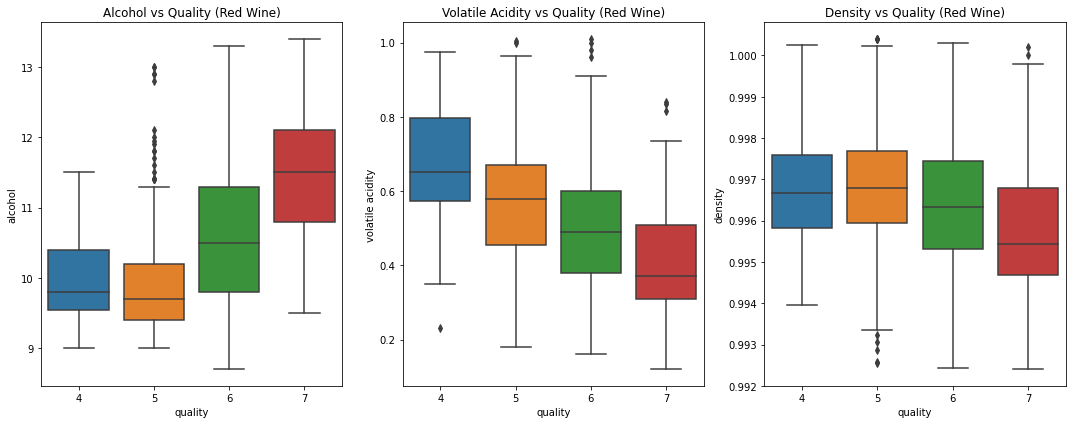

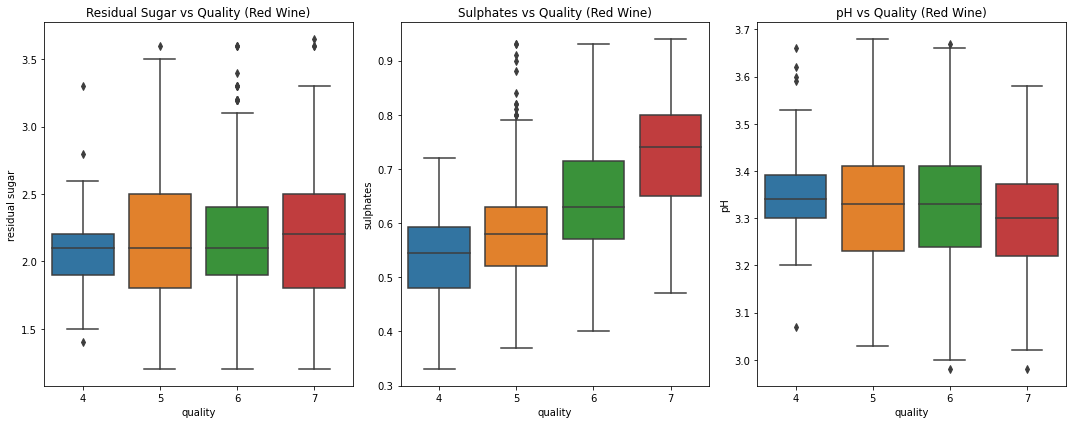

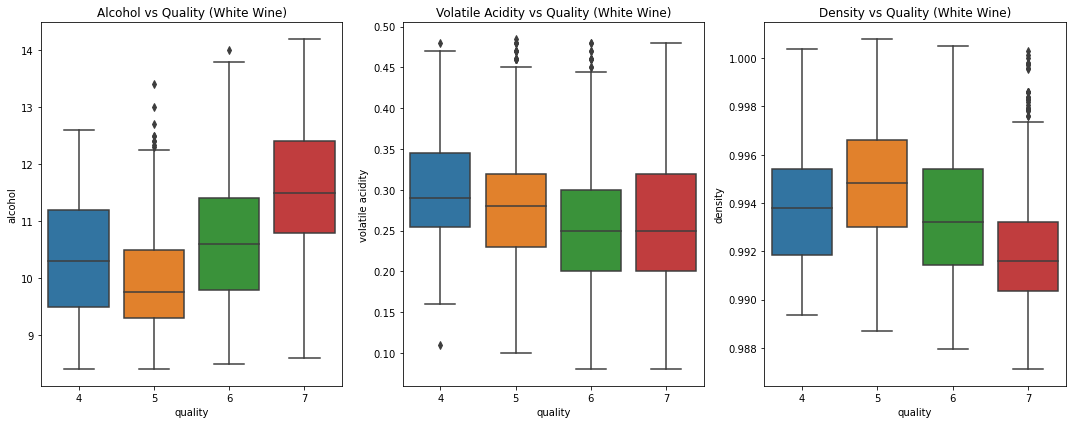

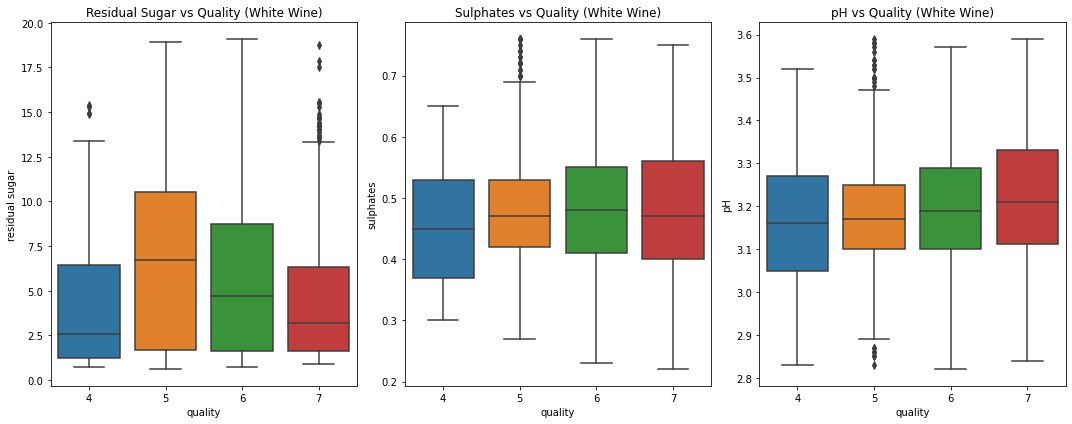

In [9]:
# Box plots for red wine
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='quality', y='alcohol', data=red_wine_cleaned)
plt.title('Alcohol vs Quality (Red Wine)')

plt.subplot(1, 3, 2)
sns.boxplot(x='quality', y='volatile acidity', data=red_wine_cleaned)
plt.title('Volatile Acidity vs Quality (Red Wine)')

plt.subplot(1, 3, 3)
sns.boxplot(x='quality', y='density', data=red_wine_cleaned)
plt.title('Density vs Quality (Red Wine)')

plt.tight_layout()
plt.show()

# More boxplots for red wine
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='quality', y='residual sugar', data=red_wine_cleaned)
plt.title('Residual Sugar vs Quality (Red Wine)')

plt.subplot(1, 3, 2)
sns.boxplot(x='quality', y='sulphates', data=red_wine_cleaned)
plt.title('Sulphates vs Quality (Red Wine)')

plt.subplot(1, 3, 3)
sns.boxplot(x='quality', y='pH', data=red_wine_cleaned)
plt.title('pH vs Quality (Red Wine)')

plt.tight_layout()
plt.show()

# Box plots for white wine
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='quality', y='alcohol', data=white_wine_cleaned)
plt.title('Alcohol vs Quality (White Wine)')

plt.subplot(1, 3, 2)
sns.boxplot(x='quality', y='volatile acidity', data=white_wine_cleaned)
plt.title('Volatile Acidity vs Quality (White Wine)')

plt.subplot(1, 3, 3)
sns.boxplot(x='quality', y='density', data=white_wine_cleaned)
plt.title('Density vs Quality (White Wine)')

plt.tight_layout()
plt.show()

# More boxplots for white wine
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='quality', y='residual sugar', data=white_wine_cleaned)
plt.title('Residual Sugar vs Quality (White Wine)')

plt.subplot(1, 3, 2)
sns.boxplot(x='quality', y='sulphates', data=white_wine_cleaned)
plt.title('Sulphates vs Quality (White Wine)')

plt.subplot(1, 3, 3)
sns.boxplot(x='quality', y='pH', data=white_wine_cleaned)
plt.title('pH vs Quality (White Wine)')

plt.tight_layout()
plt.show()

## Section 5: Feature Importance Analysis

### 5a: Train Random Forest Models

In [21]:
# Features and target
X_red = red_wine_cleaned.drop('quality', axis=1)
y_red = red_wine_cleaned['quality']

X_white = white_wine_cleaned.drop('quality', axis=1)
y_white = white_wine_cleaned['quality']

# Convert target variable to binary: "good" (quality >= 7) and "not good" (quality < 7)
y_red = (y_red >= 7).astype(int)
y_white = (y_white >= 7).astype(int)

# Split the data into training and testing sets
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Train Random Forest models
rf_red = RandomForestClassifier(random_state=42)
rf_red.fit(X_train_red, y_train_red)

rf_white = RandomForestClassifier(random_state=42)
rf_white.fit(X_train_white, y_train_white)

# Get feature importances
feature_importances_red = pd.Series(rf_red.feature_importances_, index=X_red.columns).sort_values(ascending=False)
feature_importances_white = pd.Series(rf_white.feature_importances_, index=X_white.columns).sort_values(ascending=False)

# Evaluate the models
y_pred_red = rf_red.predict(X_test_red)
y_pred_white = rf_white.predict(X_test_white)

report_red = classification_report(y_test_red, y_pred_red)
report_white = classification_report(y_test_white, y_pred_white)

roc_auc_red = roc_auc_score(y_test_red, y_pred_red)
roc_auc_white = roc_auc_score(y_test_white, y_pred_white)

# Function to convert classification report to DataFrame
def classification_report_to_df(report_str):
    report_data = []
    lines = report_str.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split()
        if len(row_data) == 0:
            continue
        if len(row_data) < 5:
            continue
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1-score'] = float(row_data[3])
        row['support'] = int(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    return dataframe

# Red wine classification report as DataFrame
report_red_df = classification_report_to_df(report_red)

# White wine classification report as DataFrame
report_white_df = classification_report_to_df(report_white)

# Feature importances as DataFrame
feature_importances_red_df = feature_importances_red.reset_index()
feature_importances_red_df.columns = ['Feature', 'Importance']

feature_importances_white_df = feature_importances_white.reset_index()
feature_importances_white_df.columns = ['Feature', 'Importance']

# Display the DataFrames
print("Red Wine Classification Report:")
display(report_red_df)

print("White Wine Classification Report:")
display(report_white_df)

print("Red Wine Feature Importances:")
display(feature_importances_red_df)

print("White Wine Feature Importances:")
display(feature_importances_white_df)


Red Wine Classification Report:


,class,precision,recall,f1-score,support
0,0,0.93,0.98,0.96,174
1,1,0.75,0.43,0.55,21


White Wine Classification Report:


,class,precision,recall,f1-score,support
0,0,0.84,0.96,0.89,492
1,1,0.62,0.26,0.36,125


Red Wine Feature Importances:


,Feature,Importance
0,alcohol,0.148152
1,sulphates,0.138947
2,density,0.101577
3,volatile acidity,0.090699
4,citric acid,0.089500
5,chlorides,0.081152
6,total sulfur dioxide,0.079742
7,fixed acidity,0.077736
8,pH,0.069557
9,residual sugar,0.062931


White Wine Feature Importances:


,Feature,Importance
0,alcohol,0.142146
1,density,0.130853
2,pH,0.091780
3,residual sugar,0.091407
4,total sulfur dioxide,0.087173
5,free sulfur dioxide,0.085035
6,chlorides,0.079402
7,volatile acidity,0.079055
8,sulphates,0.072852
9,citric acid,0.071804
